# DETERMINING DIABETES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### DATA
We want to determine diabeter by looking other 8 features.

if 'Outcome' = 1 --> Diabetes

if 'Outcome' = 0 --> Not Diabetes

In [3]:
df = pd.read_csv('DATA/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### The correlation between features

<AxesSubplot: >

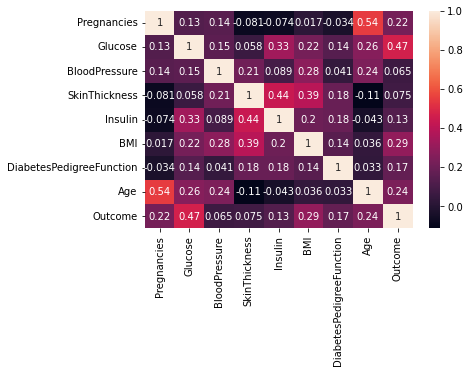

In [4]:
sns.heatmap(data=df.corr(), annot=True)

#### The correlation between features and the 'Outcome'

In [5]:
df.corr()['Outcome'].sort_values()

BloodPressure               0.065135
SkinThickness               0.075426
Insulin                     0.129973
DiabetesPedigreeFunction    0.173478
Pregnancies                 0.221272
Age                         0.237725
BMI                         0.292612
Glucose                     0.466143
Outcome                     1.000000
Name: Outcome, dtype: float64

##### Drop lowly correlated features: 'BloodPressure', 'SkinThickness'

In [6]:
df = df.drop('BloodPressure', axis=1)
df = df.drop('SkinThickness', axis=1)

## PREPARATIONS BEFORE TRAINING

##### TRAIN TEST SPLİT

In [7]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

#### PREPARING PIPELINE

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()
knn = KNeighborsClassifier()
operations = [('scaler', scaler), ('knn', knn)]

from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

#### GRID SEARCH

In [9]:
grid_param = {'knn__n_neighbors': list(range(1,30))}

from sklearn.model_selection import GridSearchCV
model = GridSearchCV(pipe, grid_param, cv=5, scoring='accuracy')
model.fit(X_train, y_train)

print("best K value: " , model.best_estimator_.get_params()['knn__n_neighbors'])

best K value:  28


Text(0, 0.5, 'Accuracy')

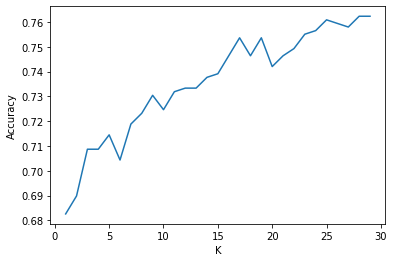

In [10]:
sns.lineplot(x=range(1,30), y=model.cv_results_['mean_test_score'])
plt.xlabel('K')
plt.ylabel('Accuracy')

#### PERFORMANCE EVALUATION

In [11]:
from sklearn.metrics import classification_report

##### TRAIN DATA

In [12]:
train_y_hat = model.predict(X_train)
print(classification_report(y_train, train_y_hat))


              precision    recall  f1-score   support

           0       0.78      0.90      0.84       443
           1       0.76      0.54      0.63       247

    accuracy                           0.77       690
   macro avg       0.77      0.72      0.73       690
weighted avg       0.77      0.77      0.76       690



##### TEST DATA

In [13]:
test_y_hat = model.predict(X_test)
print(classification_report(y_test, test_y_hat))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88        56
           1       0.77      0.48      0.59        21

    accuracy                           0.82        77
   macro avg       0.80      0.71      0.74        77
weighted avg       0.81      0.82      0.80        77

